# 6.18. Lab - Modelling in Python

## Introduction

In this lab we will step through an end-to-end prediction process. Our data comes from the UCI Machine Learning Repository: [bank data](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)

The goal is binary classification; to predict whether a customer will purchase a banking product marketed over the phone.

## Scenario

You are a data analyst working for a Portuguese bank. The bank has recently run a campaign to attempt to sell a new product to customers over the phone. The product is a term deposit, where customers deposit their money for a fixed period of time for a fixed interest rate. They want to analyze the results of this campaign to understand what makes customers likely to buy this particular product. Your job as the data analyst is to explore the data and use machine learning to build a model to predict whether a customer is likely to buy.

# <font color="red">Section 1 - exploration</font>

Take a look at the data:

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

bank_df = pd.read_csv('./bank.csv')

bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#### 1. Read the data dictionary to understand what the columns mean

Which column is the one we will use for prediction?

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

#### 2. Summarise the dataset at a high level

- How many rows and columns are there?
- Are there any missing values?
- Are the data types as you would expect them?

What do each of the results tell you in turn?

In [343]:
bank_df.isnull().sum().sort_values(ascending = False)

default           8597
housing            990
loan               990
age                  0
previous             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
poutcome             0
campaign             0
pdays                0
job                  0
day_of_week          0
month                0
contact              0
education            0
marital              0
y                    0
dtype: int64

In [345]:
bank_df["default"].fillna("Unknown", inplace=True)
bank_df["housing"].fillna("Unknown",inplace=True)
bank_df["loan"].fillna("Unknown",inplace=True)

C:\Users\lloyd\AppData\Local\Temp\ipykernel_8696\3555774237.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bank_df["default"].fillna("Unknown", inplace=True)
C:\Users\lloyd\AppData\Local\Temp\ipykernel_8696\3555774237.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  bank_df["default"].fillna("Unknown", inplace=True)
C:\Users\lloyd\AppData\

In [347]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [349]:
bank_df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


#### 3. Investigate your features.

For each variable of interest you may want to:

- Investigate the spread of values
- Check for outliers
    - What do the outliers represent? Are they meaningful or are they more likely to be errors?
    - Are the outliers "different" from our main population in a meaningful way?
    - Do the outliers represent customers that you would still want to make predictions on?

#### 4. Deal with outliers

Based on your answers to question 3, decide whether to drop or keep your outliers

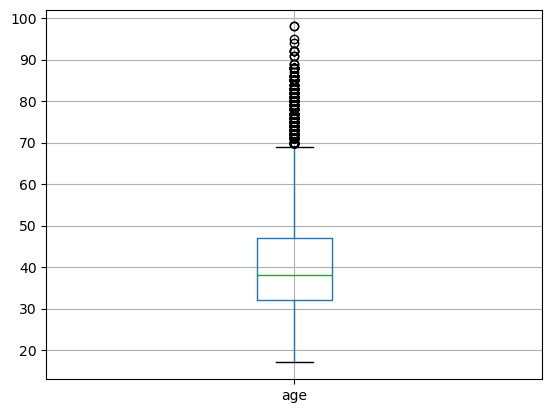

In [353]:
bank_df.boxplot('age');

In [567]:
(len(bank_df[bank_df['age'] > 70]) / len(bank_df))*100 #outliers can be ignored

1.0245702631834515

#### 5. Investigate some of the categorical columns

First, identify which columns are categorical (including binary)

Investigate the breakdown of values of some of these columns. If you notice any odd values, investigate them and deal with them (either drop or keep them).

#### 6. Now explore the relationships between your potential features and the target

The sorts of questions you are interested in are "how does the distribution of our target vary across values of our features?" - in this case "how does the % of people who purchased the product vary by age/job/education level etc.?"

First, focus on the numeric columns.

You may decide to group your continuous columns (like age) into buckets and calculate the % of people who purchased the product. A trick you can use here is that taking the average of a binary column gives you the % of 1s in that column.

What do you conclude about the relationship between your columns and the likelihood of purchasing the product?

In [360]:
def age_categorization(row):
    if row['to'] > 70:
        return "4"
    elif row['age'] > 50:
        return "3"
    elif row['age'] > 30:
        return "2"
    else:
        return "1"
bank_df['age_category'] = bank_df.apply(age_categorization, axis=1)



In [362]:
bank_df['age_category'] = bank_df['age_category'].astype(str).astype('int64')
bank_df
# [bank_df['age_category' == 2]]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_category
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3
1,57,services,married,high.school,Unknown,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0.0,1.0,0.0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,4
41184,46,blue-collar,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,2
41185,56,retired,married,university.degree,0.0,1.0,0.0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,3
41186,44,technician,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,2


In [569]:
# age is a good feature to go
bank_age = [1, 2, 3, 4]
bank_age_0 = []
bank_age_1 = []

for x in bank_age:
    a = len(bank_df[(bank_df['y'] == 0) & (bank_df['age_category'] ==x)]) 
    b = len(bank_df[(bank_df['y'] == 1) & (bank_df['age_category'] ==x)])
    c = a / (a + b)
    d = b / (a + b)
    bank_age_0.append(c)
    bank_age_1.append(d)
    
print(bank_age_0)
print(bank_age_1)

age_df = pd.DataFrame({'age': ['21-30', '31-50', '51-70', '>70'],'NO': bank_age_0, 'YES': bank_age_1})
age_df

[0.8477583638087498, 0.9085821596244131, 0.8697839597514058, 0.5213270142180095]
[0.15224163619125017, 0.09141784037558685, 0.13021604024859426, 0.4786729857819905]


,age,NO,YES
0,21-30,0.847758,0.152242
1,31-50,0.908582,0.091418
2,51-70,0.869784,0.130216
3,>70,0.521327,0.478673


#### 7. Now investigate the relationship between the categorical variables and the target

First, identify which columns in the data are categorical.

The question we care about again is "how does the % of customers who bought the product vary among different jobs/education levels etc.?"

In [366]:
bank_df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [571]:
bank_job = ['housemaid', 'services', 'admin.', 'blue-collar', 'technician','retired', 'management', 'unemployed', 'self-employed', 'unknown', \
'entrepreneur', 'student']
bank_job_0 = []
bank_job_1 = []

for x in bank_job:
    a = len(bank_df[(bank_df['y'] == 0) & (bank_df['job'] ==x)]) 
    b = len(bank_df[(bank_df['y'] == 1) & (bank_df['job'] ==x)])
    c = a / (a + b)
    d = b / (a + b)
    bank_job_0.append(c)
    bank_job_1.append(d)

print(bank_job_0)
print(bank_job_1)

job_df = pd.DataFrame({'JOB': bank_job, 'NO': bank_job_0, 'YES': bank_job_1})
job_df

[0.9, 0.9186192995716805, 0.8702744194972174, 0.931056840285282, 0.8917395817885214, 0.7476744186046511, 0.8878248974008208, 0.8579881656804734, 0.8951442646023927, 0.8878787878787879, 0.9148351648351648, 0.6857142857142857]
[0.1, 0.08138070042831948, 0.12972558050278257, 0.06894315971471796, 0.10826041821147857, 0.25232558139534883, 0.1121751025991792, 0.14201183431952663, 0.10485573539760731, 0.11212121212121212, 0.08516483516483517, 0.3142857142857143]


,JOB,NO,YES
0,housemaid,0.900000,0.100000
1,services,0.918619,0.081381
2,admin.,0.870274,0.129726
3,blue-collar,0.931057,0.068943
4,technician,0.891740,0.108260
5,retired,0.747674,0.252326
6,management,0.887825,0.112175
7,unemployed,0.857988,0.142012
8,self-employed,0.895144,0.104856
9,unknown,0.887879,0.112121


In [370]:
bank_df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [573]:
bank_edu = ['basic.4y', 'high.school', 'basic.6y', 'basic.9y','professional.course', 'unknown', 'university.degree','illiterate']
bank_edu_0 = []
bank_edu_1 = []

for x in bank_edu:
    a = len(bank_df[(bank_df['y'] == 0) & (bank_df['education'] ==x)]) 
    b = len(bank_df[(bank_df['y'] == 1) & (bank_df['education'] ==x)])
    c = a / (a + b)
    d = b / (a + b)
    bank_edu_0.append(c)
    bank_edu_1.append(d)

print(bank_edu_0)
print(bank_edu_1)

edu_df = pd.DataFrame({'Education': bank_edu, 'NO': bank_edu_0, 'YES': bank_edu_1})
edu_df

[0.8975095785440613, 0.8916447714135576, 0.9179755671902269, 0.9217535153019024, 0.8865153538050734, 0.8549971114962449, 0.8627547666009204, 0.7777777777777778]
[0.1024904214559387, 0.10835522858644246, 0.08202443280977312, 0.0782464846980976, 0.11348464619492657, 0.14500288850375506, 0.13724523339907954, 0.2222222222222222]


,Education,NO,YES
0,basic.4y,0.897510,0.102490
1,high.school,0.891645,0.108355
2,basic.6y,0.917976,0.082024
3,basic.9y,0.921754,0.078246
4,professional.course,0.886515,0.113485
5,unknown,0.854997,0.145003
6,university.degree,0.862755,0.137245
7,illiterate,0.777778,0.222222


In [375]:
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,age_category
0,56,housemaid,married,basic.4y,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3
1,57,services,married,high.school,Unknown,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3
2,37,services,married,high.school,0.0,1.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2
3,40,admin.,married,basic.6y,0.0,0.0,0.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,2
4,56,services,married,high.school,0.0,0.0,1.0,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,0.0,1.0,0.0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,4
41184,46,blue-collar,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,2
41185,56,retired,married,university.degree,0.0,1.0,0.0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,3
41186,44,technician,married,professional.course,0.0,0.0,0.0,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,2


#### 8. Using the results of your EDA choose your features to put into your first predictive model

A "good" feature is one which contains *variance of the outcome*. For example, if people in all age groups bought the product at around the same %, age would **not** be a good feature, because it doesn't get us closer to separating those that bought from those that didn't.

# <font color="red">Part 2 - our first model</font>

It's time to build your first predictive model.

#### 1. First, do any transformations required to our data
    
- If you haven't already, based on your EDA results drop any values you don't wish to use (outliers, certain categories)
- For your categorical column(s) convert the columns to a dummy (one-hot encoded) representation if you wish to use them

Once you convert the categories to dummies, drop one of the columns per category. Remember this acts as a "reference", as your "default" category. Typically we choose the category containing the most values.

In [380]:
#Feature 1 - Job
job_dummies = pd.get_dummies(bank_df.job, prefix='job',drop_first=True) 

#Feature 2 - Education
edu_dummies = pd.get_dummies(bank_df.education, prefix='education',drop_first=True) 

In [382]:
bank_df_features = pd.concat([bank_df, job_dummies, edu_dummies], axis=1)
bank_df_features.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'age_category', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown'],
      dtype='object')

In [384]:
bank_df_features.rename(columns={'y': 'subscribe'}, inplace=True)
bank_df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   job                            41188 non-null  object 
 2   marital                        41188 non-null  object 
 3   education                      41188 non-null  object 
 4   default                        41188 non-null  object 
 5   housing                        41188 non-null  object 
 6   loan                           41188 non-null  object 
 7   contact                        41188 non-null  object 
 8   month                          41188 non-null  object 
 9   day_of_week                    41188 non-null  object 
 10  campaign                       41188 non-null  int64  
 11  pdays                          41188 non-null  int64  
 12  previous                       41188 non-null 

In [386]:
# #Feature 2 - Marital
# marital_dummies = pd.get_dummies(bank_df.marital, prefix='marital',drop_first=True) 
# bank_df_dummies_2 = pd.concat([bank_df_dummies_1, marital_dummies], axis=1)
# # bank_df_dummies_2
# #Feature 4 - Default
# default_dummies = pd.get_dummies(bank_df.default, prefix='default',drop_first=True) 
# bank_df_dummies_4 = pd.concat([bank_df_dummies_3, default_dummies], axis=1)
# bank_df_dummies_4
# #Feature 5 - housing
# housing_dummies = pd.get_dummies(bank_df.housing, prefix='housing',drop_first=True) 
# bank_df_dummies_5 = pd.concat([bank_df_dummies_4, housing_dummies], axis=1)
# bank_df_dummies_5
# #Feature 6 - loan
# loan_dummies = pd.get_dummies(bank_df.loan, prefix='loan',drop_first=True) 
# bank_df_dummies_6 = pd.concat([bank_df_dummies_5, loan_dummies], axis=1)
# bank_df_dummies_6

#### 2. Create the necessary `X_train`, `X_test`, `y_train` and `y_test` variables using the features you chose above.

Make sure `X_train` and `X_test` only include the features you chose (including the dummy variables for categorical features).

In [390]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

In [392]:
# # age, job, education
# feature_cols = ['job_blue-collar', 'job_entrepreneur','job_housemaid', 'job_management', 'job_retired', 'job_self-employed', \
#                 'job_services', 'job_student', 'job_technician', 'job_unemployed','job_unknown', 'age_category', \
#                 'education_basic.6y', 'education_basic.9y', 'education_high.school','education_illiterate', \
#                 'education_professional.course','education_university.degree', 'education_unknown']
#whole features
#['job_blue-collar', 'job_entrepreneur','job_housemaid', 'job_management', 'job_retired', 'job_self-employed', \
#                'job_services', 'job_student', 'job_technician', 'job_unemployed','job_unknown', 'marital_married', 'marital_single', \
#                'marital_unknown','education_basic.6y', 'education_basic.9y', 'education_high.school','education_illiterate', \
#                'education_professional.course','education_university.degree', 'education_unknown', 'age_category', \
#                'default_1.0','default_Unknown', 'housing_1.0', 'housing_Unknown', 'loan_1.0','loan_Unknown']
                
#Use Age & Job as Features
feature_cols = ['age_category', 'job_blue-collar', 'job_entrepreneur','job_housemaid', 'job_management', 'job_retired', \
                'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed','job_unknown']

X = bank_df_features[feature_cols]
y = bank_df_features['subscribe']

In [394]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [396]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 3. Train a classifier on the training data

In [399]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))


#True Positive (True Subscriber)          #False Positive (False Subscriber) 
#False Negative (False Non subscriber)    # True Negative (True Non subscriber)


0.8375254928619986


In [302]:
print((metrics.confusion_matrix(y_test, y_pred_class)))

[[8542  604]
 [1069   82]]


In [303]:
y_test.shape

(10297,)

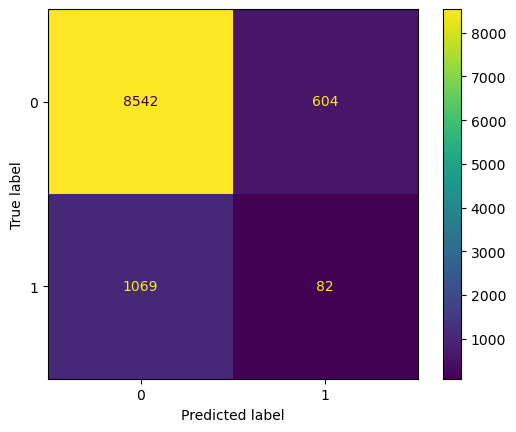

In [304]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

# True Negative (Top-Left Quadrant)
# False Positive (Top-Right Quadrant)
# False Negative (Bottom-Left Quadrant)
# True Positive (Bottom-Right Quadrant)

In [309]:
 8542 / (8542 + 1069)  #sensitivity 

0.8887732806159608

In [311]:
82 / (82 + 604) # specificity

0.119533527696793

In [226]:
#Comment: using the whole dataset to train

knn.fit(X, y)
y_pred_class = knn.predict(X)
print((metrics.accuracy_score(y, y_pred_class)))
print((metrics.confusion_matrix(y, y_pred_class)))

0.8871273186364961
[[36521    27]
 [ 4622    18]]


#### 4. Inspect the errors in more detail

Beyond summary accuracy metrics, you want to know how your model performed across various customers.

Your analysis should **not** be limited to the columns you used as features. If you used age for example, consider looking at how errors are distributed among marital status for example.

What you want to know is: ***is our model more/less accurate for different types of customers?***

An idea for this is to:
- create a column that denotes whether a customer was correctly predicted as wanting to purchase the product or not
- look at the distribution this column (i.e. the accuracy) among different categories (either age, job, education level etc.)

In [227]:
k_range = list(range(1, 20))
training_error = []
testing_error = []

# Find test accuracy for all values of K between 1 and 20 (inclusive). #running time too long
for k in k_range:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X_train)
    training_accuracy = metrics.accuracy_score(y_train, y_pred_class)
    training_error.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

KeyboardInterrupt: 

In [118]:
training_error
testing_error 

[0.16247450713800138,
 0.12411381955909484,
 0.14256579586287266,
 0.11187724579974745,
 0.11187724579974745,
 0.11187724579974745,
 0.11178013013499077,
 0.11187724579974745,
 0.11187724579974745,
 0.11178013013499077,
 0.11090608915218025,
 0.11178013013499077,
 0.11090608915218025,
 0.11178013013499077,
 0.11080897348742347,
 0.11178013013499077,
 0.11178013013499077,
 0.11178013013499077,
 0.11178013013499077]

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt

In [122]:
column_dict = {'K': k_range, 'training error':training_error, 'testing error':testing_error}
column_dict

{'K': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 'training error': [0.16296008546178498,
  0.12570004208345475,
  0.14292188663364735,
  0.1127836586708103,
  0.1127836586708103,
  0.1127836586708103,
  0.11281603055906253,
  0.1127836586708103,
  0.1127836586708103,
  0.11294551811207143,
  0.11401379042439541,
  0.11294551811207143,
  0.11391667475963874,
  0.11284840244731476,
  0.11394904664789096,
  0.11284840244731476,
  0.11284840244731476,
  0.11284840244731476,
  0.11284840244731476],
 'testing error': [0.16247450713800138,
  0.12411381955909484,
  0.14256579586287266,
  0.11187724579974745,
  0.11187724579974745,
  0.11187724579974745,
  0.11178013013499077,
  0.11187724579974745,
  0.11187724579974745,
  0.11178013013499077,
  0.11090608915218025,
  0.11178013013499077,
  0.11090608915218025,
  0.11178013013499077,
  0.11080897348742347,
  0.11178013013499077,
  0.11178013013499077,
  0.11178013013499077,
  0.11178013013499077]}

In [124]:
# error_df = pd.DataFrame({'training error':training_error, 'testing error':testing_error})
# error_df

In [126]:
error_df = pd.DataFrame(column_dict).set_index('K').sort_index(ascending=False)
error_df.head()

,training error,testing error
K,,
19,0.112848,0.111780
18,0.112848,0.111780
17,0.112848,0.111780
16,0.112848,0.111780
15,0.113949,0.110809


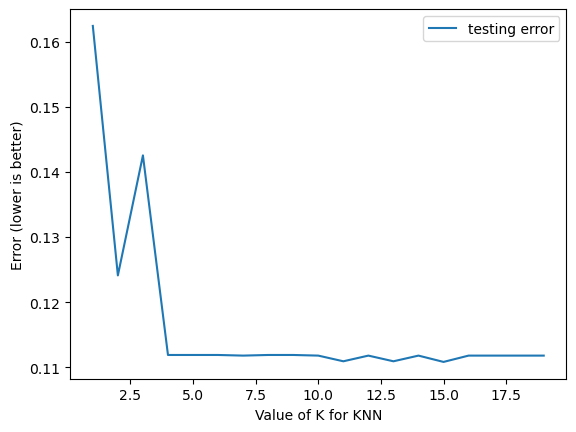

In [128]:
error_df.plot(y='testing error');
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [130]:
error_df.sort_values('testing error').head()

,training error,testing error
K,,
15,0.113949,0.110809
11,0.114014,0.110906
13,0.113917,0.110906
19,0.112848,0.111780
7,0.112816,0.111780


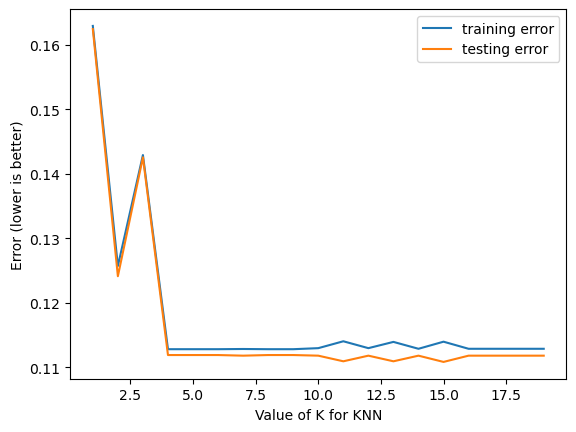

In [132]:
error_df.plot();
plt.xlabel('Value of K for KNN');
plt.ylabel('Error (lower is better)');

In [313]:
#using k= 15 which has the lowest testing error

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.8891910265125765


#### 5. Now build and inspect the confusion matrix

- What does a false positive mean in this task? What does a false negative mean?
- Which do you have more of?
- What is the cost associated with these?

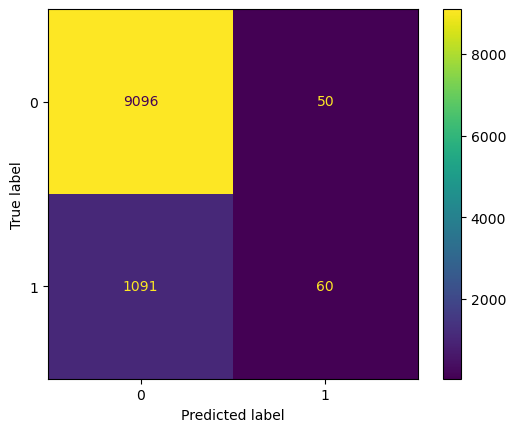

In [314]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

#### 6. Now dig into the evaluation of your first model
    
First of all, get the basic accuracy score and compare this against a baseline.
    
The baseline is "predict everything is the majority class" (in this case always predict no purchase). Our accuracy score should be higher than the % of the majority class6.

In [316]:
print(y_train.value_counts())

subscribe
0    27402
1     3489
Name: count, dtype: int64


In [317]:
most_freq_class = y_train.value_counts().index[0] 

In [322]:
most_freq_class

0

In [324]:
y_test.value_counts()

subscribe
0    9146
1    1151
Name: count, dtype: int64

In [326]:
len(y_test)

10297

In [328]:
y_test.value_counts()[most_freq_class] / len(y_test)

0.8882198698650092

In [ ]:
#Model 1 accuracy is 0.8891910265125765, slightly higher than baseline

#### 7. Build your second model

Now try to change something based on the process and results so far, and inspect the accuracy and confusion matrix again

- If you are happy with your features, you could tweak some parameters in your classifier
- If you had some additional features you thought may be useful, try adding them
- BONUS: you could even *create* new features based on your EDA!

In [537]:
bank_df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   job                            41188 non-null  object 
 2   marital                        41188 non-null  object 
 3   education                      41188 non-null  object 
 4   default                        41188 non-null  object 
 5   housing                        41188 non-null  object 
 6   loan                           41188 non-null  object 
 7   contact                        41188 non-null  object 
 8   month                          41188 non-null  object 
 9   day_of_week                    41188 non-null  object 
 10  campaign                       41188 non-null  int64  
 11  pdays                          41188 non-null  int64  
 12  previous                       41188 non-null 

In [539]:
def age_categorization_1(row):
    if row['age'] > 70:
        return "2"
    else:
        return "1"
bank_df_features['age_category_1'] = bank_df_features.apply(age_categorization_1, axis=1)

In [541]:
bank_df_features['age_category_1'] = bank_df_features['age_category_1'].astype(str).astype('int64')

In [543]:
bank_age_1 = [1, 2]  # 1 = less than 70, 2 > 70yo
bank_age_1_0 = []
bank_age_1_1 = []

for x in bank_age_1:
    a = len(bank_df_features[(bank_df_features['subscribe'] == 0) & (bank_df_features['age_category_1'] ==x)]) 
    b = len(bank_df_features[(bank_df_features['subscribe'] == 1) & (bank_df_features['age_category_1'] ==x)])
    c = a / (a + b)
    d = b / (a + b)
    bank_age_1_0.append(c)
    bank_age_1_1.append(d)
    
print(bank_age_1_0)
print(bank_age_1_1)
age_df_1 = pd.DataFrame({'NO': bank_age_1_0, 'YES': bank_age_1_1})
age_df_1


[0.8911347691703871, 0.5213270142180095]
[0.10886523082961291, 0.4786729857819905]


,NO,YES
0,0.891135,0.108865
1,0.521327,0.478673


In [575]:
# age, job, education
feature_cols_1 = ['job_blue-collar', 'job_entrepreneur','job_housemaid', 'job_management', 'job_retired', 'job_self-employed', \
                'job_services', 'job_student', 'job_technician', 'job_unemployed','job_unknown', 'age_category', \
                'education_basic.6y', 'education_basic.9y', 'education_high.school','education_illiterate', \
                'education_professional.course','education_university.degree', 'education_unknown']


X_1 = bank_df_features[feature_cols_1]
y_1 = bank_df_features['subscribe']

In [577]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, random_state=99)

In [579]:
scaler = StandardScaler()
X_1_train = scaler.fit_transform(X_1_train)
X_1_test = scaler.transform(X_1_test)

In [581]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_1_train, y_1_train)
y_1_pred_class = knn.predict(X_1_test)
print((metrics.accuracy_score(y_1_test, y_1_pred_class)))


0.8152860056327086


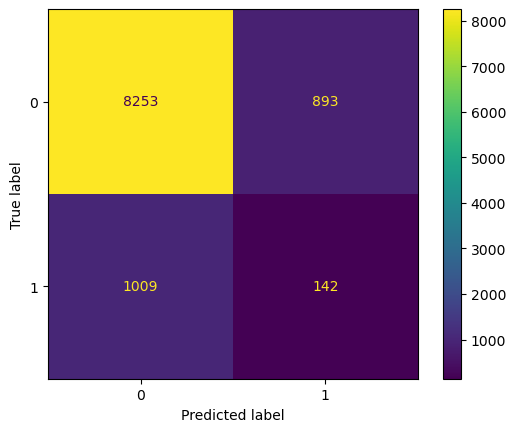

In [583]:
confusion_matrix_1 = metrics.confusion_matrix(y_1_test, y_1_pred_class)

cm_display_1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_1, display_labels = [0, 1])

cm_display_1.plot()
plt.show()

In [555]:
k_range_1 = list(range(1, 21))
training_error_1 = []
testing_error_1 = []

# Find test accuracy for all values of K between 1 and 20 (inclusive). #running time too long
for k in k_range_1:

    # Instantiate the model with the current K value.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_1_train, y_1_train)
    
    # Calculate training error (error = 1 - accuracy).
    y_pred_class = knn.predict(X_1_train)
    training_accuracy = metrics.accuracy_score(y_1_train, y_pred_class)
    training_error_1.append(1 - training_accuracy)
    
    # Calculate testing error.
    y_pred_class = knn.predict(X_1_test)
    testing_accuracy = metrics.accuracy_score(y_1_test, y_pred_class)
    testing_error_1.append(1 - testing_accuracy)

In [557]:
column_dict_1 = {'K': k_range_1, 'training error':training_error_1, 'testing error':testing_error_1}
column_dict_1

{'K': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 'training error': [0.1805703926710045,
  0.11420802175390887,
  0.12353112557055457,
  0.11731572302612414,
  0.11731572302612414,
  0.11343109643585514,
  0.11686251659059277,
  0.1160532193842867,
  0.11705674792010623,
  0.11414327797740442,
  0.11644168204331362,
  0.11294551811207143,
  0.11297789000032377,
  0.11323686510634168,
  0.11313974944158489,
  0.11323686510634168,
  0.11323686510634168,
  0.11323686510634168,
  0.11323686510634168,
  0.11323686510634168],
 'testing error': [0.1847139943672914,
  0.11479071574244926,
  0.12644459551325626,
  0.1189666893269884,
  0.1189666893269884,
  0.11391667475963874,
  0.1184811110032048,
  0.11576187239001656,
  0.11770418568515106,
  0.11420802175390887,
  0.11731572302612414,
  0.11197436146450424,
  0.11226570845877437,
  0.1116830144702341,
  0.11187724579974745,
  0.1116830144702341,
  0.1116830144702341,
  0.1116830144702341,
  0.1116830144702341,

In [559]:
error_df_1 = pd.DataFrame(column_dict_1).set_index('K').sort_index(ascending=False)
error_df_1.head()


,training error,testing error
K,,
20,0.113237,0.111683
19,0.113237,0.111683
18,0.113237,0.111683
17,0.113237,0.111683
16,0.113237,0.111683


In [561]:
error_df_1.sort_values('testing error').head()

,training error,testing error
K,,
20,0.113237,0.111683
19,0.113237,0.111683
18,0.113237,0.111683
17,0.113237,0.111683
16,0.113237,0.111683


In [585]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_1_train, y_1_train)
y_1_pred_class = knn.predict(X_1_test)
print((metrics.accuracy_score(y_1_test, y_1_pred_class)))

0.8883169855297659


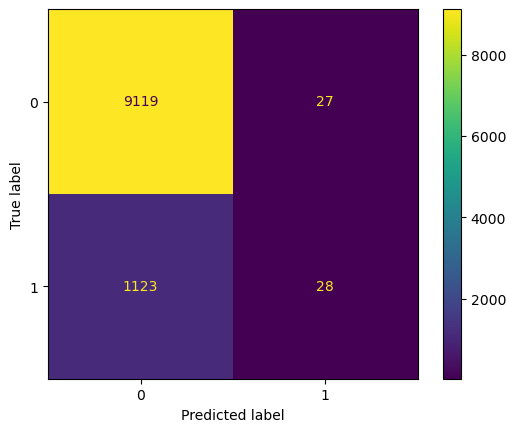

In [587]:
confusion_matrix_1 = metrics.confusion_matrix(y_1_test, y_1_pred_class)

cm_display_1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_1, display_labels = [0, 1])

cm_display_1.plot()
plt.show()

#### 8. Finally, evaluate both models on the test set

How did your two models perform? Which was better?

In [ ]:
# Both models perform better than baseline.
# Model 1 is better in term of accuracy and predicting ‘True Positive’ cases than Model 2.
# Model 1 predicted more number of ‘True Positive’ than Model 2.
